In [65]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [66]:
import tensorflow as tf
from tensorflow import keras

In [67]:
keras.__version__

'2.2.4-tf'

In [68]:
tf.__version__

'2.0.0-rc1'

In [69]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

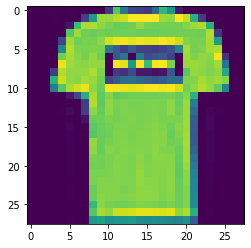

In [70]:
plt.imshow(X_train_full[1])

In [71]:
y_train_full[0]

9

In [72]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [73]:
class_names[y_train_full[1]]

'T-shirt/top'

In [74]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

# Normalization

In [75]:
X_train_n = X_train_full / 255
X_test_n = X_test / 255

In [76]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


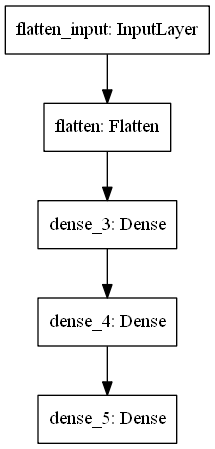

In [80]:
import pydot
keras.utils.plot_model(model)

In [81]:
weights, biases = model.layers[1].get_weights()

In [82]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [83]:
weights.shape

(784, 300)

In [84]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [85]:
biases.shape

(300,)

In [86]:
model.compile(loss= "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

* We have specific labels for 10 different lables so we are using sparse categorical crossentropy
* If we had probabilities for class in Y variables then we would have used categorical crossentropy 
* If we had binary values yes/no, true/false we would have used binary crossentropy

In [87]:
model_history = model.fit(X_train, y_train,epochs = 30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8162
Epoch 2/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4838 - accuracy: 0.8324 - val_loss: 0.4496 - val_accuracy: 0.8452
Epoch 3/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4379 - accuracy: 0.8473 - val_loss: 0.4175 - val_accuracy: 0.8556
Epoch 4/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4127 - accuracy: 0.8555 - val_loss: 0.3904 - val_accuracy: 0.8640
Epoch 5/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.3929 - accuracy: 0.8624 - val_loss: 0.3967 - val_accuracy: 0.8624
Epoch 6/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.3775 - accuracy: 0.8672 - val_loss: 0.3739 - val_accuracy: 0.8730
Epoch 7/30
55000/55000 [==============================] -

In [88]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [89]:
model_history.history

{'loss': [0.7227830873446031,
  0.4837619955062866,
  0.437924415510351,
  0.41265280682823874,
  0.39292922355044974,
  0.37754713485891167,
  0.36448877459222623,
  0.35251923360824583,
  0.3413097392949191,
  0.33229932173382154,
  0.32479410801367326,
  0.3170517075538635,
  0.3092748084740205,
  0.3029885759050196,
  0.29597848567529156,
  0.2897433715885336,
  0.2832835504076698,
  0.27737163461663505,
  0.2732134691433473,
  0.26829786763624713,
  0.2627848216793754,
  0.2586718018293381,
  0.25466173709089107,
  0.24848230504122648,
  0.24527347137819636,
  0.24085766700397837,
  0.23618670876242898,
  0.23302527539946816,
  0.22887409934347325,
  0.22512044624957173],
 'accuracy': [0.76232725,
  0.8324182,
  0.84729093,
  0.8555091,
  0.8624,
  0.8672182,
  0.87112725,
  0.8745273,
  0.8786909,
  0.8816909,
  0.8838,
  0.8861455,
  0.8885091,
  0.8916,
  0.8940727,
  0.8952,
  0.8975818,
  0.90065455,
  0.9020727,
  0.9029818,
  0.9060182,
  0.9060909,
  0.90803635,
  0.910090

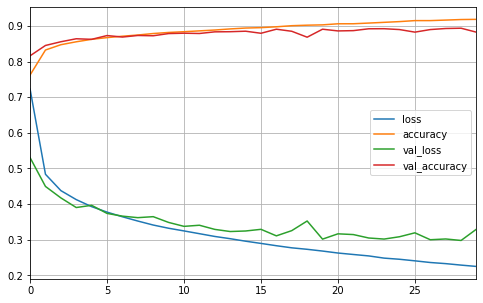

In [90]:
import pandas as pd 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_y_lim(0,1)
plt.show()

In [91]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.36387140524387357, 0.8681]

In [92]:
X_new = X_test[:3]

In [93]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [94]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [95]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


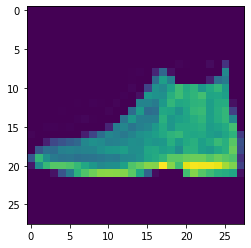

In [96]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


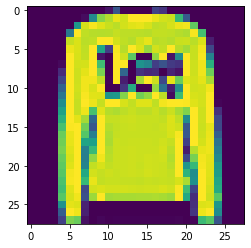

In [97]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


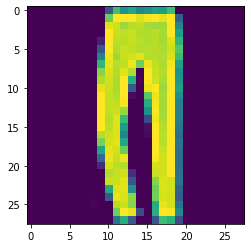

In [98]:
print(plt.imshow(X_test[2]))

# Saving and Restoring

In [99]:
model.save("my_model.h5")

In [100]:
%pwd

'C:\\Users\\ankit\\Tensorflow'

In [111]:
del model

In [102]:
keras.backend.clear_session()

In [112]:
model = keras.models.load_model("my_model.h5")

In [120]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [114]:
y_pred = model.predict(X_new)
print(y_pred)

[[6.0563502e-06 1.6073592e-07 5.8050129e-05 7.1657901e-06 1.4925370e-06
  5.0667366e-03 3.1776569e-06 1.2503053e-02 2.0384480e-04 9.8215026e-01]
 [3.4661418e-06 2.6141473e-09 9.9886131e-01 7.2885477e-08 1.0172878e-03
  1.4945717e-11 1.1794113e-04 5.6718024e-12 6.8243033e-10 7.5629624e-12]
 [6.5928557e-06 9.9999285e-01 7.3126316e-08 3.9559546e-07 6.9836076e-08
  1.8440264e-13 2.8839473e-09 8.1453870e-13 1.1747852e-08 6.4792251e-12]]
